In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.datasets import mnist


In [ ]:
# Load Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

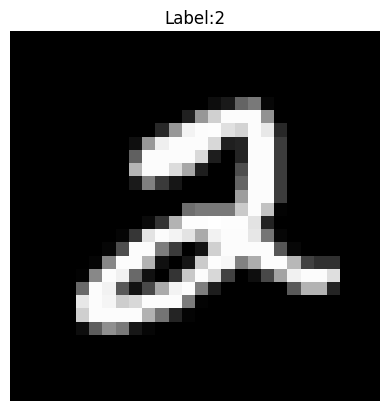

In [ ]:
plt.imshow(X_train[5].reshape(28,28),cmap='gray')
plt.title(f"Label:{y_train[5]}")
plt.axis('off')
plt.show()

In [ ]:
# Normalize the data
X_train , X_test = X_train / 255.0 , X_test/255.0

In [ ]:
# Reshape to add a single channel for CNN
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [ ]:
# One hot encode labels
y_train_cat = to_categorical(y_train, num_classes = 10)
y_test_cat = to_categorical(y_test, num_classes = 10)

In [ ]:
# Split validation dfata from training set
from sklearn.model_selection import train_test_split
X_train, X_val , y_train_cat , y_val_cat , y_train , y_val = train_test_split(
     X_train , y_train_cat , y_train , test_size = 0.1 , random_state = 42
)

In [ ]:
# Build 2D CNN model
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'), # Fully connected layer
    Dropout(0.5),
    Dense(10, activation='softmax')
])
# compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import time
start_time = time.time()
history = model.fit(X_train, y_train_cat, validation_data=(X_val,y_val_cat),epochs=2, batch_size = 32 , verbose=1 )
end_time = time.time()
training_time = end_time - start_time
print(f"Time taken for convergence: {training_time:.2f} seconds "  )

Epoch 1/2
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 60s 34ms/step - accuracy: 0.8522 - loss: 0.4646 - val_accuracy: 0.9843 - val_loss: 0.0549
Epoch 2/2
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.9750 - loss: 0.0849 - val_accuracy: 0.9883 - val_loss: 0.0381
Time taken for convergence: 142.58 seconds 


In [ ]:
# EValuate on test data
test_loss , test_accuracy = model.evaluate(X_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9860 - loss: 0.0429


In [ ]:
#Predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [ ]:
y_pred_prob[0]

array([7.1401574e-10, 3.9684494e-08, 7.4549882e-07, 1.1682530e-06,
       5.5690473e-11, 6.5681555e-10, 2.0854758e-14, 9.9999779e-01,
       2.4398061e-10, 1.9313261e-07], dtype=float32)

In [ ]:
y_pred[0]

np.int64(7)

In [ ]:
y_test[0]

np.uint8(7)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report ( accuracy , precision , recall , f1-score)
report = classification_report(y_test, y_pred, output_dict = True)

In [ ]:
conf_matrix

array([[ 975,    0,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1131,    1,    2,    0,    0,    1,    0,    0,    0],
       [   3,    1, 1025,    1,    0,    0,    0,    2,    0,    0],
       [   0,    0,    3, 1000,    0,    2,    0,    3,    1,    1],
       [   0,    0,    0,    0,  976,    0,    1,    0,    0,    5],
       [   1,    0,    0,    7,    0,  879,    1,    1,    0,    3],
       [   7,    3,    0,    0,    1,    6,  941,    0,    0,    0],
       [   0,    2,    6,    3,    0,    1,    0, 1010,    0,    6],
       [   5,    0,    3,    1,    2,    3,    1,    2,  952,    5],
       [   2,    3,    0,    1,    3,    2,    0,    0,    0,  998]])

In [ ]:
report

{'0': {'precision': 0.9818731117824774,
  'recall': 0.9948979591836735,
  'f1-score': 0.988342625443487,
  'support': 980.0},
 '1': {'precision': 0.9921052631578947,
  'recall': 0.9964757709251101,
  'f1-score': 0.9942857142857143,
  'support': 1135.0},
 '2': {'precision': 0.9865255052935515,
  'recall': 0.9932170542635659,
  'f1-score': 0.9898599710284887,
  'support': 1032.0},
 '3': {'precision': 0.9852216748768473,
  'recall': 0.9900990099009901,
  'f1-score': 0.9876543209876543,
  'support': 1010.0},
 '4': {'precision': 0.9938900203665988,
  'recall': 0.9938900203665988,
  'f1-score': 0.9938900203665988,
  'support': 982.0},
 '5': {'precision': 0.9832214765100671,
  'recall': 0.9854260089686099,
  'f1-score': 0.9843225083986562,
  'support': 892.0},
 '6': {'precision': 0.9936642027455121,
  'recall': 0.9822546972860126,
  'f1-score': 0.9879265091863517,
  'support': 958.0},
 '7': {'precision': 0.9911678115799804,
  'recall': 0.9824902723735408,
  'f1-score': 0.986809965803615,
  's

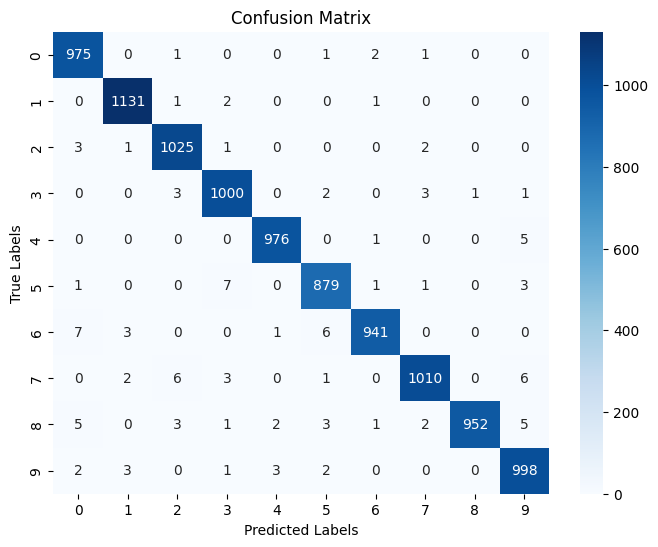

In [ ]:


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

